In [1]:
# Load all packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create DataFrame
df = pd.read_excel("../Data/Rit.xlsx", sheet_name="rit_hb")
df.columns = ['Datum', 'UurgroepOmschrijving', 'VertrekHalteCode',
       'VertrekHalteNaam', 'VertrekXCoord', 'VertrekYCoord',
       'AankomstHalteCode', 'AankomstHalteNaam', 'AankomstXCoord',
       'AankomstYCoord', 'AantalRitten']

In [3]:
df.head(5)

,Datum,UurgroepOmschrijving,VertrekHalteCode,VertrekHalteNaam,VertrekXCoord,VertrekYCoord,AankomstHalteCode,AankomstHalteNaam,AankomstXCoord,AankomstYCoord,AantalRitten
0,2018-12-24,00:00 - 00:59,0,Overig,0.0,0.000000e+00,0,Overig,0.0,0.000000e+00,80.0
1,2018-12-24,00:00 - 00:59,5046,Rembrandtplein,489627975.0,5.236626e+09,5096,Centraal Station,490049319.0,5.237968e+09,10.0
2,2018-12-24,00:00 - 00:59,5096,Centraal Station,490049319.0,5.237968e+09,0,Overig,0.0,0.000000e+00,10.0
3,2018-12-24,00:00 - 00:59,6063,Leidseplein,488064547.0,5.236476e+09,0,Overig,0.0,0.000000e+00,10.0
4,2018-12-24,01:00 - 01:59,0,Overig,0.0,0.000000e+00,0,Overig,0.0,0.000000e+00,140.0


In [6]:
dfCS = df[df['VertrekHalteNaam'] == "Centraal Station"]
print(set(dfCS["VertrekHalteCode"].tolist()))

{5096, 5097, 5100, 5101, 'CS', 5103, 5104, 5105, 5106, 5011, 5107, 5022}


In [7]:
# Filter DataFrame
# Do not include "Overig" or trips through a stations 
df = df[(df["VertrekHalteNaam"] != "Overig") & (df["AankomstHalteNaam"] != "Overig")]
df = df[df["VertrekHalteNaam"] != df["AankomstHalteNaam"]]

# Remove NaN values
df = df.dropna()

In [8]:
df.head(5)

,Datum,UurgroepOmschrijving,VertrekHalteCode,VertrekHalteNaam,VertrekXCoord,VertrekYCoord,AankomstHalteCode,AankomstHalteNaam,AankomstXCoord,AankomstYCoord,AantalRitten
1,2018-12-24,00:00 - 00:59,5046,Rembrandtplein,489627975.0,5.236626e+09,5096,Centraal Station,490049319.0,5.237968e+09,10.0
9,2018-12-24,01:00 - 01:59,5070,Nieuwezijds Kolk,489284106.0,5.237575e+09,3162,Burg.de Vlugtlaan,483818755.0,5.237884e+09,10.0
14,2018-12-24,01:00 - 01:59,6063,Leidseplein,488064547.0,5.236476e+09,5101,Centraal Station,490105195.0,5.237962e+09,10.0
24,2018-12-24,02:00 - 02:59,6063,Leidseplein,488064547.0,5.236476e+09,5096,Centraal Station,490049319.0,5.237968e+09,12.0
47,2018-12-24,05:00 - 05:59,3106,Troelstralaan,480145216.0,5.237472e+09,4267,Schiphol Airport/Plaza,476139454.0,5.230887e+09,10.0


In [34]:
# df.groupby(["VertrekHalteNaam", "AankomstHalteNaam"]).size().sort_values(ascending=False)
df = df[(df["VertrekHalteNaam"] == "Rokin") | (df["VertrekHalteNaam"] == "Centraal Station")]
df = df[(df["AankomstHalteNaam"] == "Rokin") | (df["AankomstHalteNaam"] == "Centraal Station")]
dfMetro = df[(df["VertrekHalteCode"] == 5022) | (df["VertrekHalteCode"] == 5035)]
dfMetro = dfMetro[(dfMetro["AankomstHalteCode"] == 5022) | (dfMetro["AankomstHalteCode"] == 5035)]
dfTram = df[(df["VertrekHalteCode"] == "RKN") | (df["VertrekHalteCode"] == "CS")]
dfTram = dfTram[(dfTram["AankomstHalteCode"] == "RKN") | (dfTram["AankomstHalteCode"] == "CS")]
print(dfTram.size)
print(dfMetro.size)

2541
1067


In [9]:
# Filter the data for a single hour
df = df[(df["Datum"] == "2018-12-30") & (df["UurgroepOmschrijving"] == "00:00 - 00:59")]

In [18]:
# Create graph from DataFrame
G = nx.from_pandas_edgelist(df, "VertrekHalteCode", "AankomstHalteCode", "AantalRitten")
G.to_directed()

In [19]:
from collections import defaultdict
pos = defaultdict()

vertrekhaltes = df["VertrekHalteCode"].tolist()
vertrekx = df["VertrekXCoord"].tolist()
vertreky = df["VertrekYCoord"].tolist()

for i in range(len(vertrekhaltes)):
    pos[vertrekhaltes[i]] = (vertrekx[i], vertreky[i])
    
aankomsthaltes = df["AankomstHalteCode"].tolist()
aankomstx = df["AankomstXCoord"].tolist()
aankomsty = df["AankomstYCoord"].tolist()

for i in range(len(aankomsthaltes)):
    pos[aankomsthaltes[i]] = (aankomstx[i], aankomsty[i])

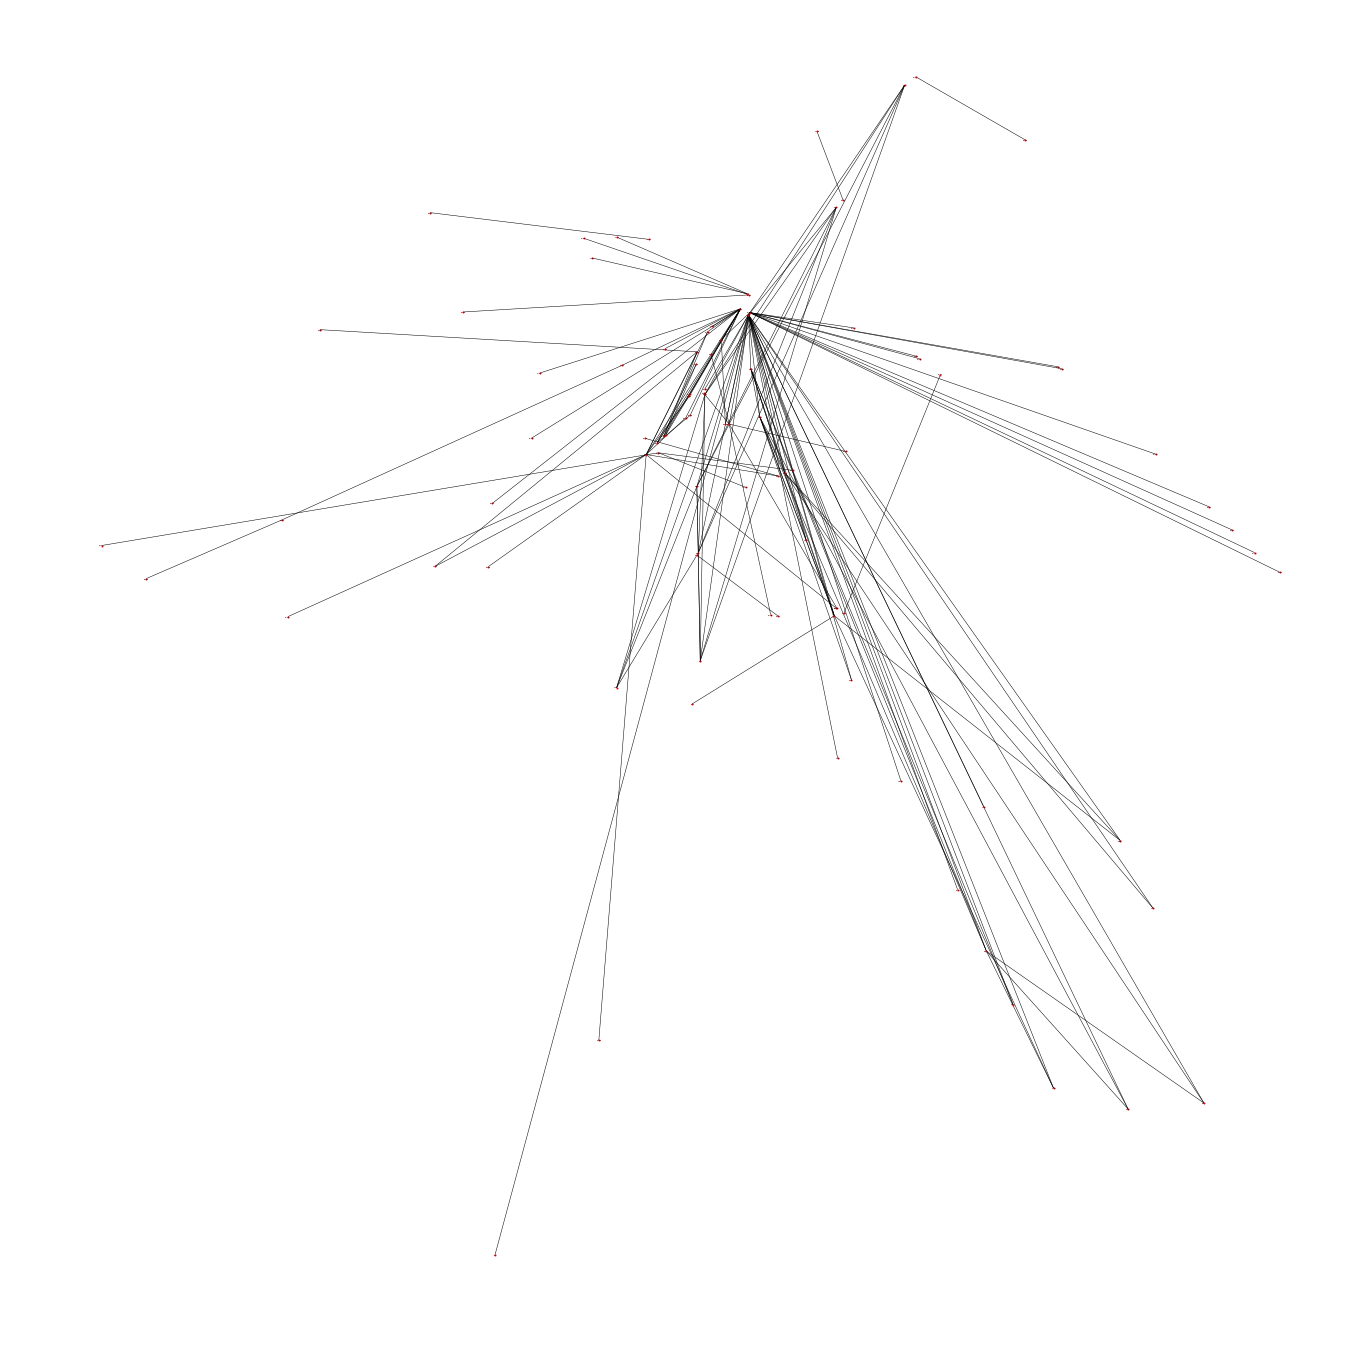

In [20]:
plt.figure(figsize=(18,18))
nx.draw(G, pos=pos, with_labels = True, node_size=1, font_size = 2, width = 0.5, arrowsize = 3)
plt.show()